# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("datasets/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
y = df['Sales']
X = df.drop(['Sales'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test.shape, y_test.shape

((40, 3), (40,))

In [4]:
type(y_test)

pandas.core.series.Series

In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [6]:
lr.coef_, lr.intercept_

(array([0.05450927, 0.10094536, 0.00433665]), np.float64(4.714126402214127))

In [7]:
y_pred[:5]

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879])

## Evaluation of Regression

In [8]:
# Mean squared error
# Mean Absolute Error
# Root Mean Squared Error
# R2 Score
from sklearn.metrics import mean_squared_error, mean_absolute_error,root_mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")    
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 2.9077569102710896
Mean Absolute Error: 1.2748262109549338
Root Mean Squared Error: 1.7052146229349223
R2 Score: 0.9059011844150826


### Regularization (Lasso L1)

-> Tends to make coefficient to absolute zero

-> Add the absolute value of magnitude of coefficient as a penality term to a loss function

In [11]:
from sklearn.linear_model import Lasso
for x in np.arange(0,10, 2):
    lasso = Lasso(alpha=x, random_state=42)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    print(f"The r2 score for the lasso regularization is {r2_score(y_test, lasso_pred)}")

The r2 score for the lasso regularization is 0.9059011844150828
The r2 score for the lasso regularization is 0.9041453507738758
The r2 score for the lasso regularization is 0.9004900770141292
The r2 score for the lasso regularization is 0.894911927903171
The r2 score for the lasso regularization is 0.8880782469771963


c:\Users\2000149664\Desktop\NVIDIA certification\.venv\Lib\site-packages\sklearn\base.py:1363: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\2000149664\Desktop\NVIDIA certification\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\2000149664\Desktop\NVIDIA certification\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.141e+02, tolerance: 4.288e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented 

In [10]:
print(f"The r2 score for the lasso regularization is {r2_score(y_test, lasso_pred)}")

The r2 score for the lasso regularization is 0.9052166208889012


### Ridge Regularization (L2)

In [14]:
from sklearn.linear_model import Ridge
for x in np.arange(0,10, 2):
    ridge = Ridge(alpha=x, random_state=42)
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)
    print(f"The r2 score for the ridge regularization is {r2_score(y_test, ridge_pred)}")


The r2 score for the ridge regularization is 0.9059011844150826
The r2 score for the ridge regularization is 0.9058986474210291
The r2 score for the ridge regularization is 0.90589611020507
The r2 score for the ridge regularization is 0.9058935727673993
The r2 score for the ridge regularization is 0.9058910351082109


### Asumptions of Linear regression

#### 1. We assume there is linear relationship between the features and the target

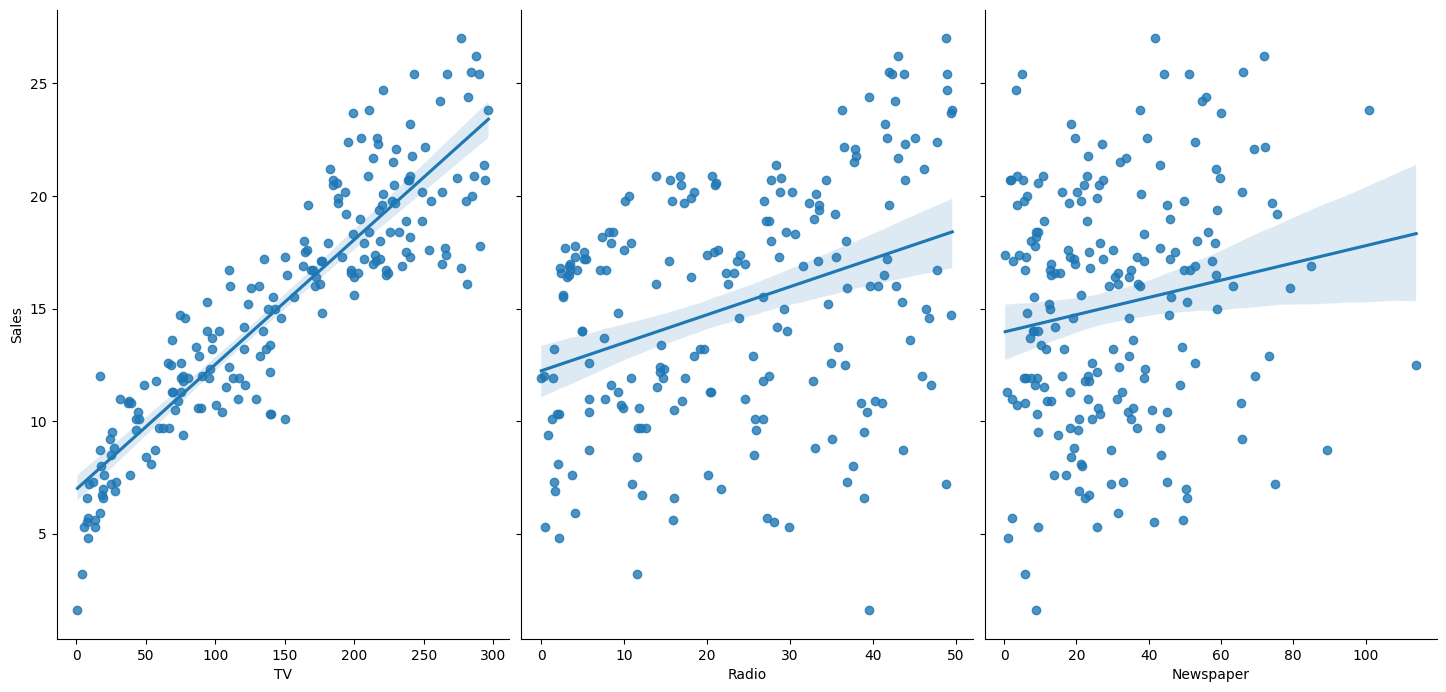

In [19]:
# we can find the linear relation ship by using pairplot
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=7, aspect=0.7, kind='reg')
plt.show()

We can see that the is linear regression between the tv and the sales and nearly in radio and newspaper also...

#### 2. We assume that the mean of the residuals is equal to zero

In [22]:
# residuals is the difference between the actual value and the predicted value
residuals = y_test - y_pred
residuals

95    -0.134772
15     1.990260
30    -2.323989
158   -1.972785
128    3.017281
115    0.030598
69     1.218805
170   -0.290350
174   -0.737013
45    -0.566575
66     2.076035
182    0.218266
165   -1.307512
78    -2.767507
186   -2.345510
177    1.768372
56    -2.628146
152   -1.298766
82     0.291194
68    -1.578328
124   -1.106318
16    -0.098833
148   -0.005183
93    -0.188548
65     1.882039
60     0.174933
84     0.860915
67    -0.415209
125   -0.170809
132   -2.226825
9     -0.359474
18     0.665091
55     2.897080
75    -1.734342
150   -5.478475
104   -0.483645
135   -0.528218
137   -2.009533
164   -0.709928
76     0.435587
Name: Sales, dtype: float64

In [23]:
# Now we will calculate the mean of the residuals and check if it is equal to zero
np.mean(residuals)

np.float64(-0.398503385030851)

We can observe that the value is nearly equal to 0

#### 3. We assume that the distribution of the error/residuals terms is normal distribution

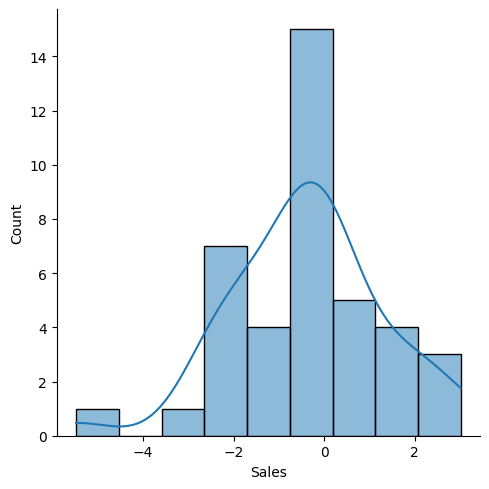

In [25]:
# We can check the distribution of the residuals by using displot
sns.displot(residuals, kde=True)
plt.show()

We can observe the normal/ bell curve

#### 4. We assume there is no multicollinearity in the data

Multicollinearity exists if there is correlation between the features in the data

- if multicollinearity exists, model performance decreases
- we can calculate multicollinearity by variance inflation factor (from statsmodel)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calculator(X):
    x_arr = X.values
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(x_arr, i) for i in range(X.shape[1])]
    vif["Features"] = X.columns
    return vif

In [29]:
vif_calculator(X)

,VIF,Features
0,2.486772,TV
1,3.285462,Radio
2,3.055245,Newspaper


- If vif > 4 --> Multicollinearity exists in the data
- If vif < 4 -->  No Multicollinearity exists in the data